# Gravity! - SOLUTION

Continuing from the previous notebook, now we're going to try a more difficult problem: gravity! We'll do this in two dimensions for simplicity, though we could also do it in three dimensions. We've now got more variables than before. It's still ordinary differential equations though. The only derivative is a time derivative.

Now we want to solve a vector equation:

$$\vec{F~} = - \frac{G~M~m}{r^2} \hat{r~}$$

We'll take this to be the force on $m$, so $F = m a$. In terms of the unnormalized vector $\vec{r~}$, we have

$$\vec{a~} = - \frac{G~M}{r^2} \frac{\vec{r~}}{r}$$

where $r$ is the length of $\vec{r~}$.

So how do we put this into the form scipy expects? We define the position of the little object by

$$\vec{r~} = (x, y)$$

Then the length is

$$r = \sqrt{x^2 + y^2}$$

We have second-order differential equations for both $x$ and $y$. We need four variables $x$, $y$, $v_x$, $v_y$.

We also need to rescale our variables. Kilograms, meters, and seconds aren't great for describing orbits. We'll get a lot of huge numbers. Let's define a rescaling:

$$t = T~\tau$$

$$r = R~\rho$$

So the differential equation looks something like

$$\frac{d^2 r}{d t^2} = \frac{R}{T^2} \frac{d^2 \rho}{d \tau^2} = - \frac{G~M}{(R~\rho)^2}$$

or

$$\frac{d^2 \rho}{d \tau^2} = - \left( \frac{G~M~T^2}{R^3}\right) ~ \frac{1}{\rho^2}$$

All the units have been collected into one single factor. If we choose $R = 1~\mathrm{AU}$ and $T = 1~\mathrm{yr}$, and set $M$ to the mass of the Sun, this factor becomes a nice number close to $1$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# In addition to the imports, we'll also import some constants
# And also define our own
# NOTE: All units in SI
from scipy.constants import gravitational_constant, au

year = 365.25*24*3600 # seconds

mass_sun = 1.989e30 # kg

earth_distance = 1.496e11 # meters
# The Earth distance is also defined as 1 AU
mars_distance = 227.9*1.e9 # meters
jupiter_distance = 778.57*1.e9 # meters

## Exercise

We've just defined several useful constants. Use them to determine the constant $\frac{G~M~T^2}{R^3}$. Call the variable `scale_factor`.

In [2]:
scale_factor = gravitational_constant * mass_sun * year ** 2 / au ** 3

# Note that the scale_factor is (2pi)^2
# which is related to the circular motion
np.sqrt(scale_factor)

np.float64(6.283998929838098)

Now we're ready to define the gravitational acceleration and start some calculations. Read the explanation above carefully, then

## Exercise

Complete the derivatives function below.

In [3]:
# Gravitational acceleration in 2D

def grav_derivs(state, t):
    x, y, vx, vy = state
    
    r =  (x ** 2 + y ** 2) ** 0.5 # Calculate the distance from x and y
    acc =  - scale_factor / r ** 2 # Calculate the magnitude of the acceleration
    acc_x =  acc * x / r # Calculate the vector components of the acceleration
    acc_y =  acc * y / r # Calculate the vector components of the acceleration
    
    return (vx, vy, acc_x, acc_y)

## Exercise

Read the two cells of code below. The equation is being solved. Answer the following questions:
 1. For what length of time is the orbit being solved?
 1. What is the starting position of the planet?
 1. What is the starting velocity?
 1. What kind of orbit do you expect?
Write brief answers, then run the code and see if you're correct. You may need to debug your derivatives function.

In [4]:
times = np.linspace(0., 0.3, 100000)
r_init = (1, 0., 0., 1) # Starting values at t = 0
rarr = odeint(grav_derivs, r_init, times)

Answers:
 1. The orbit is being calculated for 0.3 years, in steps of around 95 seconds
 1. The starting position of the planet is at x=1, y=0 (AU)
 1. The starting velocity is vx=0, vy=1 (AU / year)
 1. The velocity is less than 2 $\pi$ AU / year, so I expect this to be an elliptical orbit. This could possibly be a plunge, however as we have not defined a collision criterion, so it would revert to being elliptical with a very close perihelion.

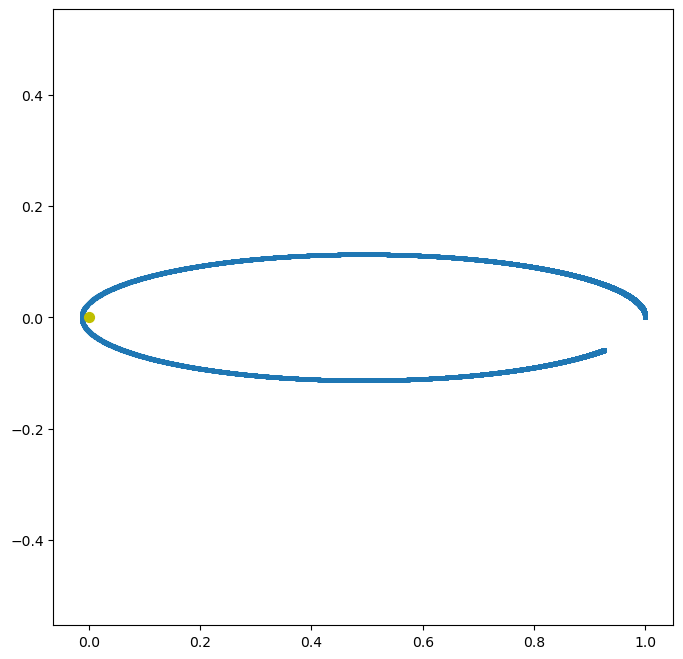

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(rarr[:,0], rarr[:,1], s=5)
plt.scatter(0., 0., c='y', s=50)
plt.gca().set_aspect('equal', 'datalim')

In [6]:
# Your answer here!